# Environment Setup

In [1]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'test.csv', 'csv_submission.csv', 'train.csv', 'csv_submission_20181101-1135.csv', 'gender_submission.csv']


# Data Set Loading

In [3]:
df = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0, encoding='utf-8')
df.shape

(891, 12)

In [17]:
from sklearn.model_selection import train_test_split

# Divide into training and cross-validation datasets.
X_train, X_test, y_train, y_test = train_test_split(df, df.loc[:, 'Survived'], test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 12) (712,)
(179, 12) (179,)


# Statistics

In [18]:
print('Sample')
X_train.shape, X_test.shape

Sample


((712, 12), (179, 12))

In [6]:
print('Column types')
print(X_train.dtypes)

Column types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
# Check which columns have missing data.
print('\nMissing values')
print(X_train.isnull().any())


Missing values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [8]:
print('\nStats')
print(X_train.describe())


Stats
       PassengerId    Survived      Pclass         Age       SibSp  \
count   712.000000  712.000000  712.000000  572.000000  712.000000   
mean    448.234551    0.376404    2.330056   29.498846    0.553371   
std     256.731423    0.484824    0.824584   14.500059    1.176404   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.750000    0.000000    2.000000   21.000000    0.000000   
50%     453.500000    0.000000    3.000000   28.000000    0.000000   
75%     673.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  712.000000  712.000000  
mean     0.379213   32.586276  
std      0.791669   51.969529  
min      0.000000    0.000000  
25%      0.000000    7.925000  
50%      0.000000   14.454200  
75%      0.000000   30.500000  
max      6.000000  512.329200  


In [9]:
# Copied from article: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation
def num_missing(x):
    return sum(x.isnull())

# Applying per column:
print("Missing values per column:")
print(X_train.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

# Applying per row:
print("\nMissing values per row:")
print(X_train.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

Missing values per row:
331    0
733    1
382    1
704    1
813    1
dtype: int64


In [10]:
{'Survived':X_train.query('Survived == 1').count()[0], 'Did not':X_train.query('Survived == 0').count()[0]}

{'Survived': 268, 'Did not': 444}

In [11]:
# Check people age under 1.
X_train.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


# Visualization of Data

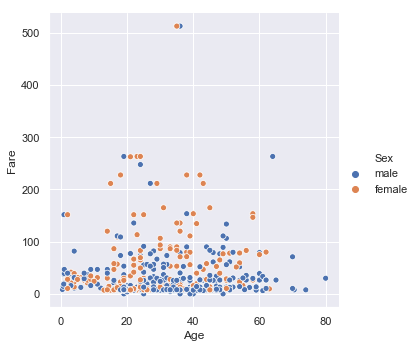

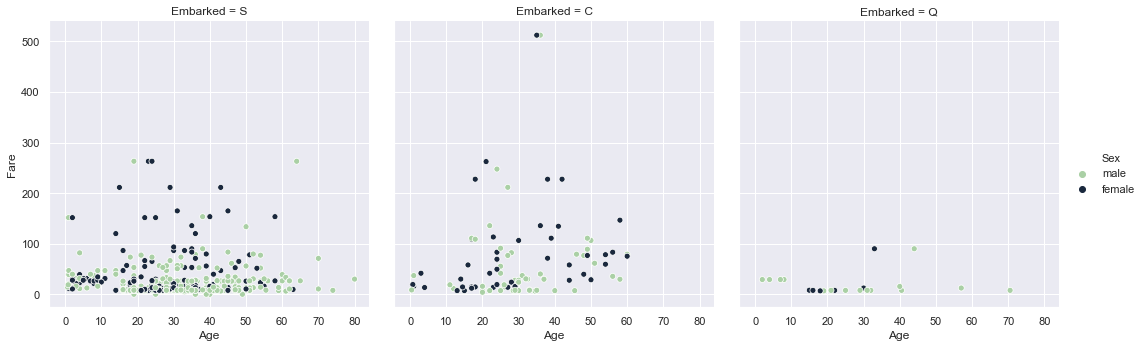

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Remove outliers.
# X_train = X_train[X_train.Fare < 300]

# http://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="Age", y="Fare", hue="Sex", data=X_train) # size="Fare", sizes=(0, 100), 
sns.relplot(x="Age", y="Fare", hue="Sex", col="Embarked", palette="ch:r=-.5,l=.75", data=X_train) # size="Fare", sizes=(0, 100), 
# plt.title('Fare per age')
plt.show()

In [13]:
# Group by age and count to see the distribution.
age_2_count = X_train.groupby('Age')['PassengerId'].count().reset_index(name="Count")

# Transpose for the sake of visibility
age_2_count.loc[:15,].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Count,1.00,1.00,2.00,1.00,1.00,7.0,10.0,6.0,8.0,2.0,2.0,3.0,4.0,5.0,1.0,3.0


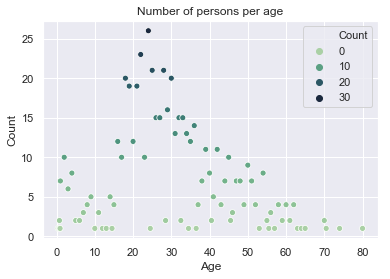

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Use the binary classifier on all data.
# Xs = age_2_count.loc[:,'Age']
# Ys = age_2_count.loc[:,'Count']
sns.scatterplot(x="Age", y="Count", hue="Count", palette="ch:r=-.5,l=.75", data=age_2_count) # size="Fare", sizes=(0, 100), 

plt.title('Number of persons per age')
plt.show()

# Preparing Training Data Set

In [15]:
df_tmp = pd.get_dummies(X_train, columns=['Pclass','Sex'])

df_tmp.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
count,709.000000,709.000000,569.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,447.765867,0.373766,29.468084,0.555712,0.379408,30.556334,0.225670,0.212976,0.561354,0.344147,0.655853
std,256.797677,0.484144,14.532043,1.178341,0.792745,41.628403,0.418318,0.409700,0.496572,0.475425,0.475425
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,21.000000,0.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,453.000000,0.000000,28.000000,0.000000,0.000000,14.400000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,672.000000,1.000000,38.000000,1.000000,0.000000,30.070800,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def create_X(df_raw, use_one_hot=False):
    features_clf = 'Sex,Fare'.split(',')
    X = df_raw.loc[:, features_clf]

    if use_one_hot:
        # Features to one-hot encode.
        features_to_encode = ['Sex']
        
        # Use one-hot encoding for categorical data.
        X = pd.get_dummies(X, columns=features_to_encode)
    else:
        # Add Sex as number.
        sex_to_number = lambda x: 1 if x == 'male' else 0
        X['Sex'] = df_raw.loc[:, 'Sex'].apply(sex_to_number)

    return X
        
# Prepare the data sets.
X = create_X(X_train, use_one_hot=True)
Y = X_train.loc[:, 'Survived']
X.iloc[:10,:]

# 5-fold Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.base import clone

def print_features_importance(df, clf):
    # Display the features by descending importance.
    df_disp = pd.DataFrame(list(zip(list(df.columns), clf.feature_importances_)))
    df_disp.columns = ['Feature', 'Percentage']
    print(df_disp.sort_values(by='Percentage', ascending=False).to_string(index=False))

def cross_val_score_do(name, clf, X, Y, cv):
    # Cross validate the classifier.
    scores = cross_val_score(clf, X, Y, cv=cv)
    print("\n%s Score: %.10f" % (name, scores.mean()))
    
    # Fit the classifier and show the feature importance.
    clf_cloned = clone(clf)
    clf_cloned.fit(X, Y)
    
    # Display the features by descending importance.
    print_features_importance(X, clf_cloned)

In [ ]:
clf_rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=101)
cross_val_score_do('RandomForestClassifier', clf_rfc, X, Y, 5)

clf_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=290)
cross_val_score_do('ExtraTreesClassifier', clf_etc, X, Y, 5)

clf_dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=13)
cross_val_score_do('DecisionTreeClassifier', clf_dtc, X, Y, 5)

clf_gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=1, random_state=43)
cross_val_score_do('GradientBoostingClassifier', clf_gbc, X, Y, 5)

# SGDClassifier(max_iter=5)

# 5-fold Cross Validation with GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

def do_cross_validation(clf, X, Y, k):
    """
    Run the k-fold GridSearchCV on X and Y
    
    Parameters
    ----------
    clf: the original classifier to clone for testing the hyperparameters.
    X: the data set to use for splitting into training and cross validation datasets.
    Y: the labels.
    k; the number of cross validation datasets split from X.
    
    Returns
    -------
    clf: the best classifier after evaluating all the possible hyperparameter settings.
    
    """
    parameters = {'max_features': [1, len(X.columns)], 'n_estimators': [5, 50, 250, 400, 1000]}

    clf_cv = GridSearchCV(clf, parameters, cv=k)

    %timeit
    clf_model = clf_cv.fit(X, Y)

    # Display the scores.
    for row in clf_model.grid_scores_:
        print(row)

    return clf_model.best_estimator_

clf = do_cross_validation(clf_etc, X, Y, 5)

# Evaluation of the Classifier

In [ ]:
from sklearn.metrics import confusion_matrix

# Print features importance.
print_features_importance(X, clf)

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def display_metrics(clf, X, Y):
    # Predict the values on X.    
    X_prediction = clf.predict(X)

    print("Score: %.15f" % clf.score(X, Y))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y, X_prediction)
    # tn, fp, fn, tp = cnf_matrix.ravel()

    # Compute confusion matrix
    np.set_printoptions(precision=2)

    class_names = ['Did Not', 'Survived']

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

In [ ]:
display_metrics(clf, X, Y)

# Imputation of Missing Values

In [ ]:
print("Missing values per column:")
print(X_train.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

In [ ]:
# One method to show entries with NA values for Embarked column.
# nans = lambda df: df[df.isnull().any(axis=1)]
# nans(df_raw.loc[:, ['Embarked']])

# Another method to show entries, not working
# print(df_raw[df_raw['Embarked'].apply(np.isnan)])

# Preferred method to show entries where Embarked is null, NaN, etc.
print(X_train.query('Embarked != Embarked').loc[:, ['PassengerId', 'Embarked']])
print('\n' + str(X_train.isnull().any()))

In [ ]:
# Show the most frequent value in the features.
X_train['Age'].mode().values[0]

In [ ]:
from sklearn.preprocessing import Imputer


def impute(df, df_for_fit=None, strategy='mean', column='Age'):
    """
    Impute the data frame using a strategy on a column.
    
    Parameters
    ----------
    df: DataFrame: the data frame to transform with the fitted value.
    df_for_fit: None or the data frame to fit the Imputer. If None then df is used for fitting.
    strategy: a string for the strategy name defined from sklearn.preprocessing.Imputer.
    column: a string for the name of the column to apply the imputation.
    
    Returns
    -------
    DataFrame: the 'df' with a new column called 'column'_imputed instead of the 'column'.
    
    """
    # Define the imputer working on columns. 
    imp = Imputer(missing_values=np.nan, strategy='mean', axis=1)

    # Get the dataframe used to fit the imputer.
    df_fit = df_for_fit if df_for_fit is None else df

    # Fit the imputer.
    model_imp2 = imp.fit(df_fit)

    # Transform the df.
    res = pd.DataFrame(model_imp2.transform(df))
    res.columns = df.columns
    
    # Make a copy to add the new column and remove the old one.
    df_tmp = df.drop(column, axis=1)
    new_column = column + '_imputed'
    df_tmp[new_column] = np.array(res[column])
    
    return df_tmp

In [ ]:
# Proceed to impute the Age column.
X_aug = pd.concat([X, X_train.loc[:, 'Age']], axis=1)

print(X_train.query('Age != Age').loc[:, ['PassengerId','Age']].iloc[:10, :])
X_imp = impute(X_aug, X_aug, column='Age')

print(X_aug.shape, X_imp.shape)

In [ ]:
# Show the result.
print("Missing values per column:")
print(X_imp.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

In [ ]:
# Run the CV.
clf_impured_1 = do_cross_validation(clf_etc, X_imp, Y, 5)

In [ ]:
# Score
print("Score: %.15f" % clf_impured_1.score(X_imp, Y))

# Print features importance.
print_features_importance(X_imp, clf_impured_1)

In [ ]:
# Display metrics.
display_metrics(clf_impured_1, X_imp, Y)

# Test on X_test Dataset

In [ ]:
# Create the test sets.
Xt = create_X(X_test, use_one_hot=True)
Yt = y_test

print(Xt.shape, X_aug.columns)

# Proceed to impute the Age column.
X_test_aug = pd.concat([Xt, X_test.loc[:, 'Age']], axis=1)
print(X_test_aug.shape)

# print(X_test.query('Age != Age').loc[:, ['PassengerId','Age']])
X_test_imp = impute(X_test_aug, X_aug, column='Age')

print(X_test_imp.shape, X_test_imp.columns)

In [ ]:
print(X_test_aug.shape, X_test_imp.shape)

# Show the result.
print("Missing values per column:")
print(X_test_imp.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

# Run the CV.
clf_impured_1 = do_cross_validation(clf_etc, X_test_imp, Yt, 5)

# Score
print("Score: %.15f" % clf_impured_1.score(X_test_imp, Yt))

# Print features importance.
print_features_importance(X_test_imp, clf_impured_1)

# Display metrics.
display_metrics(clf_impured_1, X_test_imp, Yt)

# CSV of Test Data Set Prediction

In [ ]:
# Load the test set.
df_test_raw = pd.read_csv(base_path_data + '/test.csv', sep=",", header=0, encoding='utf-8')

print(df_test_raw.isna().any())
print(df_test_raw.dtypes)

# Show the result.
print("Missing values per column:")
print(df_test_raw.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

print(df_test_raw.iloc[:10,])
df_test_raw.query('Fare != Fare')

In [ ]:
from sklearn.preprocessing import Imputer

X_test_given = create_X(df_test_raw, use_one_hot=True)
print(X_test_given.shape)

X_test_given_aug = pd.concat([X_test_given, df_test_raw.loc[:, 'Age']], axis=1)

print(X_test_given_aug.shape, X_test_aug.shape)
print(X_test_given_aug.columns, X_aug.columns)

X_test_given_imp = impute(X_test_given_aug, X_aug, column='Age')
X_test_given_imp = impute(X_test_given_imp, X_aug, column='Fare')

X_test_given_imp['Fare'] = np.array(X_test_given_imp['Fare_imputed'])
X_test_given_imp = X_test_given_imp.drop('Fare_imputed', axis=1)

In [ ]:
# Show the result.
print("Missing values per column:")
print(X_test_given_imp.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

In [ ]:
X_test_given_predicted = clf_impured_1.predict(X_test_given_imp)

# print(X_test.iloc[:10,])

In [ ]:
import datetime

df_to_submit = pd.DataFrame(list(zip(df_test_raw.loc[:,'PassengerId'], X_test_given_predicted)))
df_to_submit.columns = ['PassengerId', 'Survived']
df_to_submit.PassengerId = df_to_submit.PassengerId.astype(np.int32)
df_to_submit.Survived = df_to_submit.Survived.astype(np.int32)

today = datetime.datetime.today()
today_s = today.strftime('%Y%m%d-%H%M')

csv_dest = "%s/csv_submission_%s.csv" % (base_path_data, today_s)

# Save the CSV
df_to_submit.to_csv(csv_dest, index=False)

print("test prediction save in:\n %s" % csv_dest)